JHK 

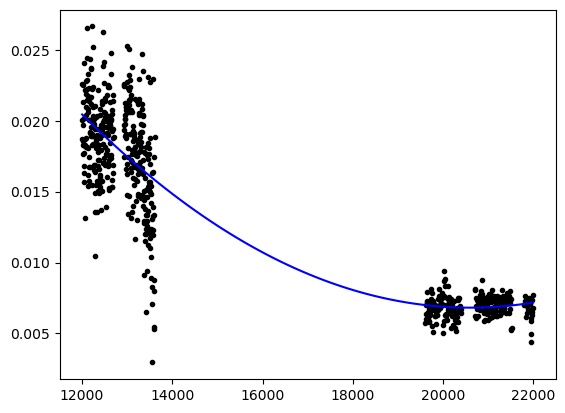

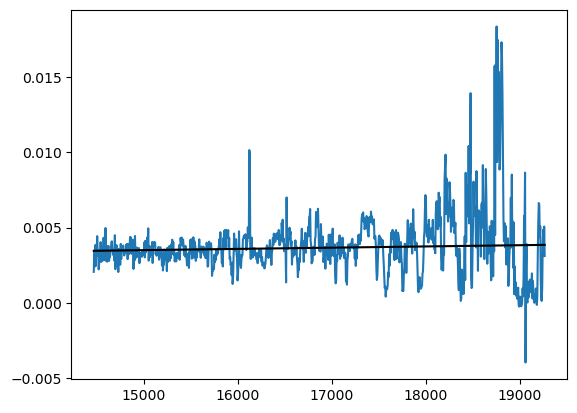

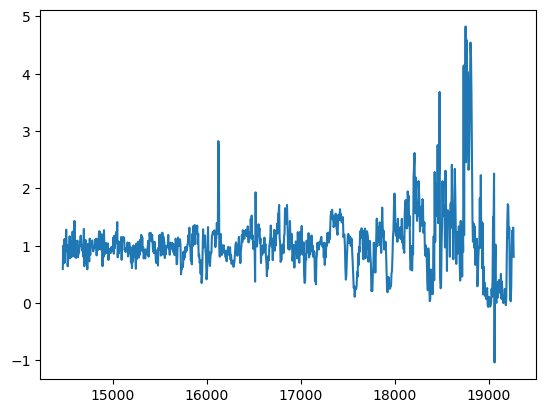

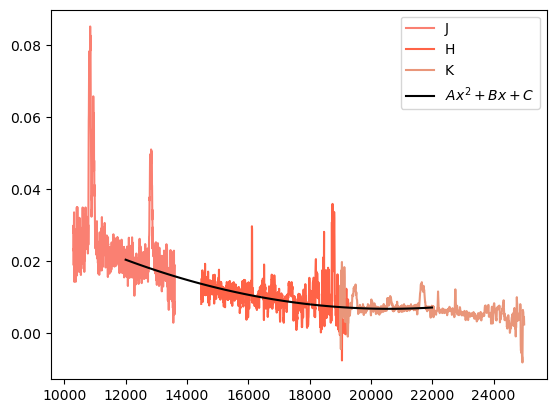

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, shutil
from scipy import interpolate
from scipy.optimize import minimize

os.chdir(r'/home/parallels/V455_And/gemini_data/2005_09_09')

K1_spec = np.loadtxt('v455And_kurK_spec.txt')
K2_spec = np.loadtxt('v455And_kurK1_spec.txt')
k_fl1 = np.interp(K2_spec[:,0], K1_spec[:,0], K1_spec[:,1])
k_mean = np.median([k_fl1, K2_spec[:,1]])
K_spec=np.array((K2_spec[:,0], k_fl1))
K_spec=K_spec.transpose()

os.chdir(r'/home/parallels/V455_And/gemini_data/2005_09_01')
H_spec = np.loadtxt('v455And_kurH_spec.txt')
J_spec = np.loadtxt('v455And_kurJ_spec.txt')

jhk_wv = np.concatenate((J_spec[:,0][:920], K_spec[:,0]))
jhk_fx = np.concatenate((J_spec[:,1][:920], K_spec[:,1]))
JHK = np.array((jhk_wv,jhk_fx))
JHK = JHK.transpose()

def cut(spec):
    wv, fx = [], []
    for i in range(len(spec[:,0])):
        #if spec[:,0][i] < 10750:
        #    wv.append(spec[:,0][i])
        #    fx.append(spec[:,1][i])
        if spec[:,0][i] > 12000 and spec[:,0][i] < 12700: #11100
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 12920 and spec[:,0][i] < 18000: #19300 and 19300
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 19600 and spec[:,0][i] < 20400:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 19600 and spec[:,0][i] < 20400:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 20700 and spec[:,0][i] < 21525:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 21800 and spec[:,0][i] < 22000: #right border=none
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
    wv = np.array(wv)
    fx = np.array(fx)
    return wv, fx

cont_wv, cont_fx = cut(JHK) # cutting spectra for intrerpolation between J and K bands

z = np.polyfit(cont_wv, cont_fx, 2)
p = np.poly1d(z)
plt.figure()
plt.plot(cont_wv, cont_fx, '.k')
lambs = np.linspace(cont_wv[0], cont_wv[len(cont_wv)-1], 100)
plt.plot(lambs, p(lambs), '-b')

la=[]
fl=[]
for i in range(len(H_spec[:,0])):
    if H_spec[:,0][i] > 14400 and  H_spec[:,0][i] < 17500:
        la.append(H_spec[:,0][i])
        fl.append(H_spec[:,1][i])
    elif H_spec[:,0][i] > 18700:
        la.append(H_spec[:,0][i])
        fl.append(H_spec[:,1][i])

la, fl = np.array(la), np.array(fl)
        
h = np.polyfit(la, fl, 1)
ph = np.poly1d(h)
H_fx = H_spec[:,1][80:1000] / ph(H_spec[:,0][80:1000])
plt.figure()
plt.plot(H_spec[:,0][80:1000], H_spec[:,1][80:1000])
plt.plot(H_spec[:,0][80:1000], ph(H_spec[:,0][80:1000]), '-k')
#plt.plot(la, fl)
#plt.plot(H_spec[:,0], ph(H_spec[:,0]), '-k')

plt.figure()
plt.plot(H_spec[:,0][80:1000], H_fx)

plt.figure()
plt.plot(J_spec[:,0][:920], J_spec[:,1][:920], color='salmon', label='J')
plt.plot(H_spec[:,0][80:1000], p(H_spec[:,0][80:1000])*H_fx, color='tomato', label='H')
plt.plot(K_spec[:,0], K_spec[:,1], color='darksalmon', label='K')
plt.plot(lambs, p(lambs), '-k', label='$Ax^{2} + Bx + C$')
plt.legend()

sed_wv = np.concatenate((J_spec[:,0][:920], H_spec[:,0][80:1000], K_spec[:,0]))
sed_fl = np.concatenate((J_spec[:,1][:920], p(H_spec[:,0][80:1000])*H_fx, K_spec[:,1]))
sed_fl = sed_fl
jhk_sed = np.array((sed_wv, sed_fl))
jhk_sed = jhk_sed.transpose()

POWER-LAW FITTING

 
-1.902 x + 6.042


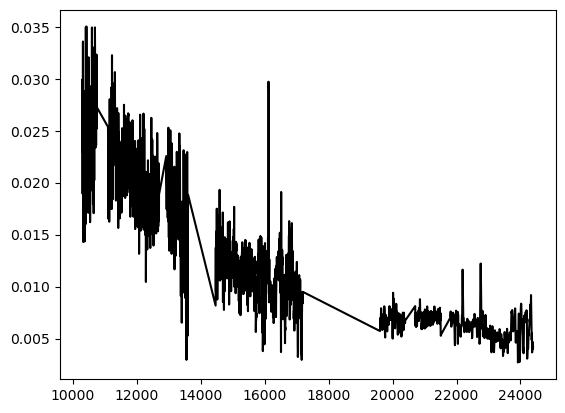

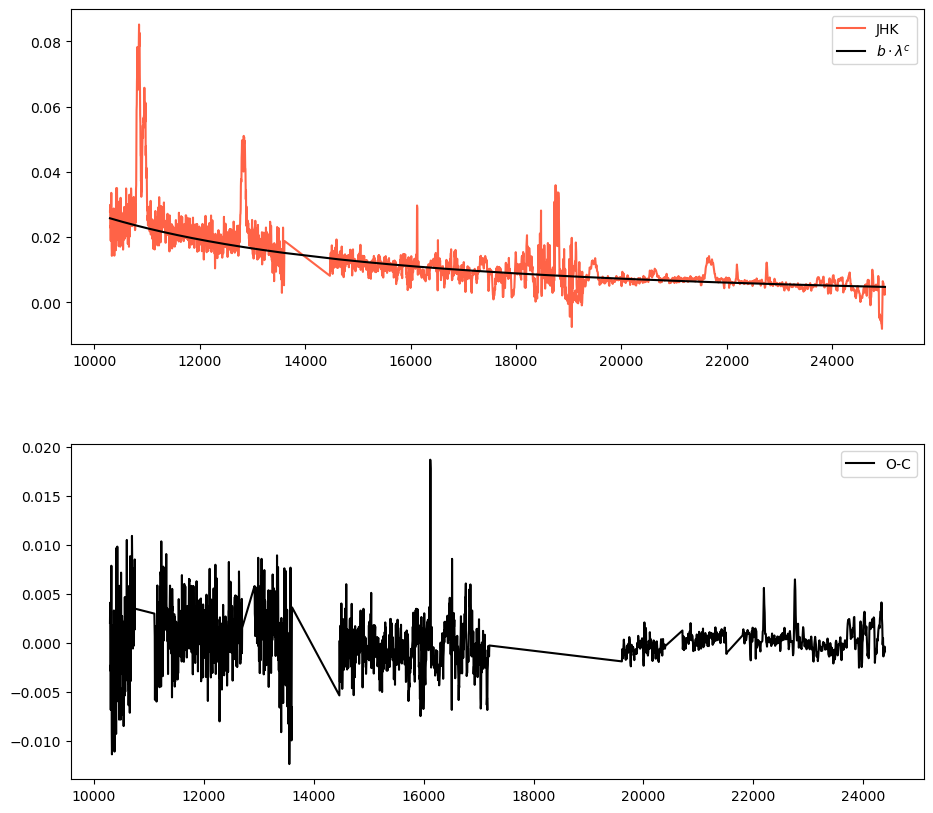

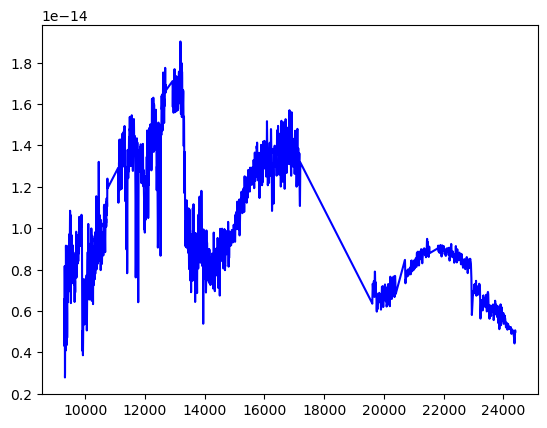

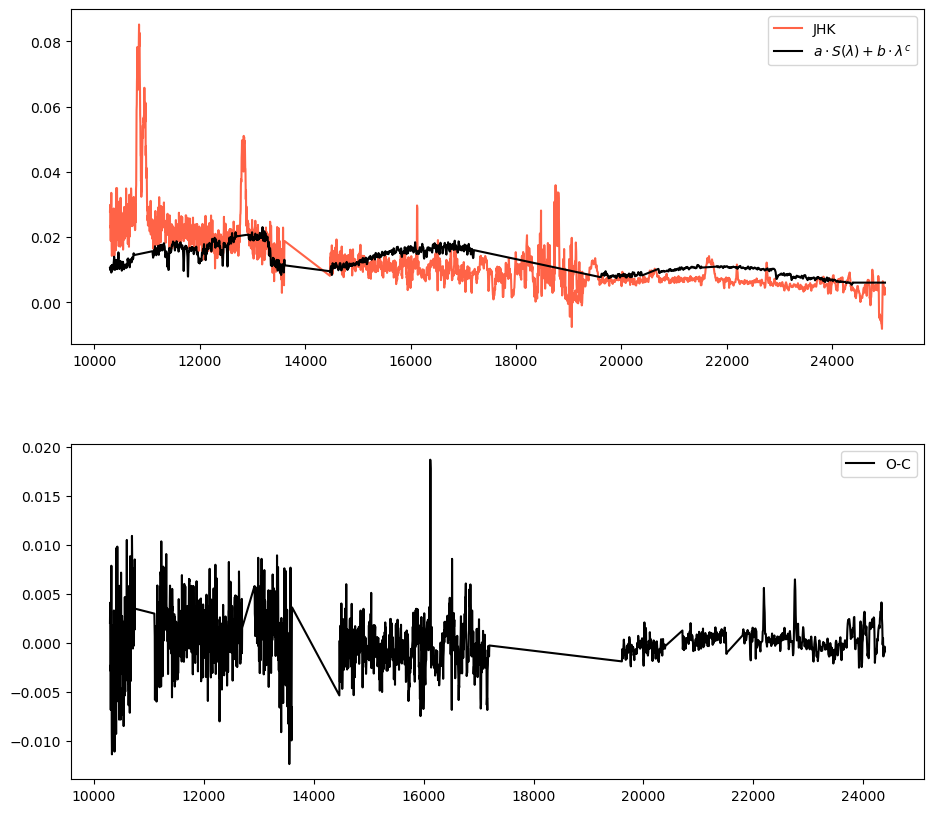

In [3]:
from scipy.optimize import minimize

def sed_cut(spec):
    wv, fx = [], []
    for i in range(len(spec[:,0])):
        if spec[:,0][i] < 10750:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 11100 and spec[:,0][i] < 12700:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 12920 and spec[:,0][i] < 17200:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        #elif spec[:,0][i] > 18700 and spec[:,0][i] < 19300:
        #    wv.append(spec[:,0][i])
        #    fx.append(spec[:,1][i])
        elif spec[:,0][i] > 19600 and spec[:,0][i] < 20400:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 20700 and spec[:,0][i] < 21525:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
        elif spec[:,0][i] > 21800 and spec[:,0][i] < 24400:
            wv.append(spec[:,0][i])
            fx.append(spec[:,1][i])
    wv = np.array(wv)
    fx = np.array(fx)
    return wv, fx

sed_cont, sed_cofl = sed_cut(jhk_sed)
plt.figure()
plt.plot(sed_cont, sed_cofl, '-k')

'''
pars = [-1.5, 2]
res = minimize(chi2, pars, method='Nelder-Mead')
C, B = res.x[0], res.x[1]
fit = B*sed_cont**(C)
print(C, B)
'''

z = np.polyfit(np.log10(sed_cont), np.log10(sed_cofl), 1)
p = np.poly1d(z)
print(p)



fit = 10**(p[0])*sed_wv**(p[1])
plt.figure(figsize=(11, 10))
plt.subplots_adjust(hspace=0.3)

plt.subplot(211)
plt.plot(sed_wv, sed_fl, color='tomato', label='JHK')
plt.plot(sed_wv, fit, '-k', label='$b\cdot\\lambda^{c}$')
plt.legend()

fit = 10**(p[0])*sed_cont**(p[1])
plt.subplot(212)
plt.plot(sed_cont, sed_cofl - fit, '-k', label='O-C')
plt.legend()



#LSM-method with spectral component of L2-dwarf
os.chdir(r'/home/parallels/V455_And/gemini_data')

dwarf = pd.read_table('L2_Kelu-1AB.txt', header=None)
dwarf=np.loadtxt(dwarf[0])
dwarf[:,0] = dwarf[:,0]*10**4.0
dw_wv, dw_fx = sed_cut(dwarf)

plt.figure()
plt.plot(dw_wv, dw_fx, '-b')

def scale(k):
    s=0
    rl = np.interp(sed_cont, dw_wv, dw_fx)
    for i in range(len(sed_cont)):
        s+=(rl[i] - k*sed_cofl[i])**2.0
    return s

def powerlaw(a, b, c, lamb, tempfl):
    return a*tempfl + b*lamb**(c)

def chi2(pars):
    s=0
    rl = np.interp(sed_cont, dw_wv, dw_fx)
    for i in range(len(sed_cont)):
        s+=(sed_cofl[i] - powerlaw(pars[0], pars[1], pars[2], sed_cont[i], rl[i]))**2.0
    return s

pars=[0.9, -2.0, 1]
res = minimize(chi2, pars, method='Nelder-Mead')
a, b, c = res.x[0], res.x[1], res.x[2]

rl = np.interp(sed_wv, dw_wv, dw_fx)
fit = powerlaw(a, b, c, sed_wv, rl)

plt.figure(figsize=(11, 10))
plt.subplots_adjust(hspace=0.3)

plt.subplot(211)
plt.plot(sed_wv, sed_fl, color='tomato', label='JHK')
plt.plot(sed_wv, fit, '-k', label='$a \cdot S(\\lambda) + b\cdot\\lambda^{c}$')
plt.legend()

fit = 10**(p[0])*sed_cont**(p[1])
plt.subplot(212)
plt.plot(sed_cont, sed_cofl - fit, '-k', label='O-C')
plt.legend()





[11000.6051336826, 11004.2101871788, 11007.8152406749, 11011.4202941711, 11015.0253476672, 11018.6304011634, 11022.2354546595, 11025.8405081557, 11029.4455616518, 11033.050615148, 11036.6556686441, 11040.2607221403, 11043.8657756364, 11047.4708291326, 11051.0758826287, 11054.6809361249, 11058.285989621]
[11065.4960966133, 11069.1011501095, 11072.7062036056, 11076.3112571018, 11079.9163105979, 11083.5213640941, 11087.1264175902, 11090.7314710864, 11094.3365245825, 11097.9415780787, 11101.5466315748, 11105.151685071, 11108.7567385671, 11112.3617920633, 11115.9668455594, 11119.5718990556]
[11180.8578084902, 11184.4628619863, 11188.0679154825, 11191.6729689786, 11195.2780224748, 11198.8830759709, 11202.4881294671, 11206.0931829632, 11209.6982364594, 11213.3032899555, 11216.9083434517, 11220.5133969478, 11224.118450444, 11227.7235039401, 11231.3285574363, 11234.9336109324, 11238.5386644286]
[11422.3963927323, 11426.0014462284, 11429.6064997246, 11433.2115532207, 11436.8166067169, 11440.4216

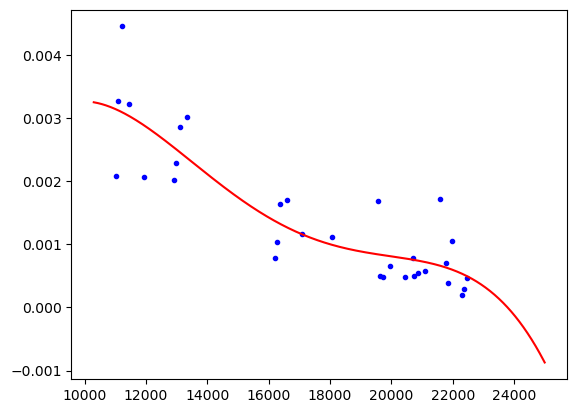

In [4]:
AA = [10810, 10840, 10940, 12825, 16100, 19460, 20600, 21700, 22200, 22750]
w = 60
wing = 60
std = []
f = []
k = 1
band = []
aa = []
L = []
#for i in range(spectra):
for j in range(len(sed_wv)): 
    if sed_wv[j] > (AA[k-1] + wing) and sed_wv[j] < (AA[k-1] + (wing + w)):
        f.append(sed_fl[j])
        aa.append(sed_wv[j])
    if sed_wv[j] >= (AA[k-1] + (wing + w)) and len(aa)!=0:
        #print(AA[k-1] + 2*wing)
        band.append(aa)
        std.append(np.std(f))
        print(aa)
        l = np.mean(aa)
        L.append(l)
        f = []
        aa = []
        wing = 2 * wing
    if sed_wv[j] >= (AA[k] - w):
        k = k + 1
        wing = w
        f = []
        aa = []
    if k == len(AA):
        break
            
z = np.polyfit(L, std, 4)
p = np.poly1d(z)

xx = np.linspace(sed_wv[0], sed_wv[len(sed_wv)-1], 1000) 
plt.plot(L, std, '.b') 
plt.plot(xx, p(xx), '-r') 
plt.show()           

INITIALIZATION OF DWARF GRID AND V455AND IR FLUXES

In [4]:
#V455 And JHK FLUXES
wv_ir=np.array([1.235, 1.662, 2.159])*10000
mag_ir=np.array([15.528, 15.199, 14.567])
F0=np.array([3.129*10**(-13.0), 2.9*10**(-11), 4.283*10**(-13.0)])*10**7.0*10**(-4.0)
fx_ir=F0*10**(-0.4*mag_ir)
mag_ir_er=np.array([0.067, 0.093, 0.087])
fx_ir_err=np.array(F0*10**(-0.4*(mag_ir-mag_ir_er)))

os.chdir(r'/home/parallels/V455_And/gemini_data')
#V455 And WISE FLUXES
import math
wv_wise=np.array([3.35, 4.6, 11.6, 22.1])*10000
wise_data=pd.read_csv('wisev455and.csv')
w1, w2, w3, w4 = [], [], [], []
for i in range(len(wise_data['mjd'])):
    w1.append(float(wise_data['w1mpro_ep'][i]))
    w2.append(float(wise_data['w2mpro_ep'][i]))
    if math.isnan(float(wise_data['w3mpro_ep'][i])) == False:
        w3.append(float(wise_data['w3mpro_ep'][i]))
    if math.isnan(float(wise_data['w4mpro_ep'][i])) == False:
        w4.append(float(wise_data['w4mpro_ep'][i]))
w1, w2, w3, w4 = np.array(w1), np.array(w2), np.array(w3), np.array(w4)
mag_wise = np.array([np.mean(w1), np.mean(w2), np.mean(w3), np.mean(w4)])
F0=np.array([309.540*10**(-23)/(wv_wise[0]/10)**2.0, 171.787*10**(-23)/(wv_wise[1]/10)**2.0, 31.674*10**(-23.0)/(wv_wise[2]/10)**2.0, 8.363*10**(-23)/(wv_wise[3]/10)**2.0])*2.998*10**(16)
fx_wise=F0*10**(-0.4*mag_wise)


#Dusty models reading
os.chdir(r'/home/parallels/V455_And/gemini_data/dwmodels')
list=[]
for file in os.listdir():
    if file.endswith(".txt"):
        list.append(file)
names=sorted(list)


def Egglton(M2):
    Porb = 0.05630921 / 365.2422 # in years
    M1 = 0.7
    q=M2/M1
    A = (M2*(1+1/q)*Porb**2.0)**(1/3.0) 
    au = 1.49597870700e13
    return (A*au) * 0.5126 * q**(0.7388) / (0.6710*q**(0.7349) + np.log(1 + q**(0.3983))) #in cm

def logg(M2, R):
    GMsun=1.3271244e26 # sgs
    return np.log10(GMsun*M2/R**2.0)

M2=np.linspace(0.01, 0.1, 10)
R2=Egglton(M2)
lgg=logg(M2, R2)


g=-1
T0=0
FLX, WISE=[], []
LGGS=[]
IRFLX=[]
grid=[[], [], [], [], []] #T, lgg, jhk fluxes, specs, wise fluxes
for i in range(len(names)):
    f = open(names[i], 'r')
    contents = f.readlines()
    T=float(contents[1][9:13])
    lggs=float(contents[2][9:12])
    spec=np.loadtxt(names[i], skiprows=6)
    flx=np.interp(sed_wv, spec[:,0], spec[:,1])
    ir_flx = np.interp(wv_ir, spec[:,0], spec[:,1])
    wise_flx = np.interp(wv_wise, spec[:,0], spec[:,1])
    FLX.append(flx)
    IRFLX.append(ir_flx)
    LGGS.append(lggs)
    WISE.append(wise_flx)
    g+=1
    if g==2:
        grid[0].append(T)
        grid[1].append(LGGS)
        grid[2].append(IRFLX)
        grid[3].append(FLX)
        grid[4].append(WISE)
        g=-1
        FLX, WISE=[], []
        LGGS=[]
        IRFLX=[]
    
def linear_interp(y1, y2, x1, x2, x):
    y = y1 + (y2 - y1)*(x - x1)/(x2 - x1)
    return y

def chisq(pars, obs_flx, temp_flx, wvlng):
    s=0
    for i in range(len(obs_flx)):
        s+=(obs_flx[i] - powerlaw(pars[0], pars[1], pars[2], wvlng[i], temp_flx[i]))**2.0
    return s

parallax = 13.1888e-3 #mas
d = 1 / parallax * 3e18 #in cm

def L(f, dw_flx, lamb, c):
    return f*(dw_flx) + (1-f)*lamb**c

def a_reduced(lfunc, obs_flx):
    s, s1 = 0, 0
    for i in range(len(obs_flx)):
        s+=obs_flx[i]*lfunc[i]
        s1+=lfunc[i]*lfunc[i]
    return s / s1

def f_chi2(f, a_red, obs_flx, dw_flx, lamb, c):
    s=0
    for i in range(len(lamb)):
        s+=(obs_flx[i] - a_red * L(f, dw_flx[i], sed_cont[i], c))**2.0
    return s

T2 RESTRICTION

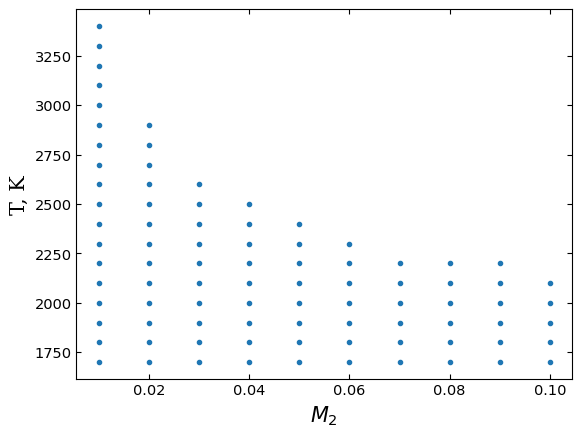

In [5]:
csfont = {'fontname':'Serif'}
m2, T2, m2_border, T2_border = [], [], [], []
for i in range(12, len(grid[0])):
    for j in range(len(lgg)):
        for k in range(1, len(grid[1][i])):
            if (lgg[j] > grid[1][i][k-1] and lgg[j] < grid[1][i][k]):
                
                F_lamb=linear_interp(grid[2][i][k-1], grid[2][i][k], grid[1][i][k-1], grid[1][i][k], lgg[j])
                F_wise=linear_interp(grid[4][i][k-1], grid[4][i][k], grid[1][i][k-1], grid[1][i][k], lgg[j])
                
                break

        f0_lamb = (R2[j]/d)**2.0 * F_lamb
        f0_wise = (R2[j]/d)**2.0 * F_wise

        if (f0_lamb[0] < fx_ir[0] and f0_lamb[1] < fx_ir[1] and f0_lamb[2] < fx_ir[2] and f0_wise[0] < fx_wise[0] and f0_wise[1] < fx_wise[1] and f0_wise[2] < fx_wise[2] and f0_wise[3] < fx_wise[3]):
            m2.append(M2[j])
            T2.append(grid[0][i])
        else:
            m2_border.append(M2[j])
            T2_border.append(grid[0][i])
            break

T2_old=[3400, 2900, 2600, 2500, 2400, 2300, 2200, 2200, 2200, 2100]
csfont = {'fontname':'Serif'}
plt.figure()
#plt.plot(m2_border, T2_border, '-k')
#plt.plot(M2, T2_old, '-r')
plt.plot(m2, T2, '.')
plt.ylabel('T, K', **csfont, size=15)
plt.xlabel('$M_{2}$', **csfont, size=15)
plt.tick_params(axis="both", direction="in", right='on', top='on', labelsize=10.5)

SOLVING NORMAL SYSTEM EQUATION FOR TWO-COMPONENT MODELING

In [ ]:
c=np.linspace(-0.001, -10, 1000)
rms, RMS, rms_list, coeffs, COEFFS= [], [], [], [], []
csfont = {'fontname':'Serif'}
pars=[0.9, -2.0, 1]
m2, T2, m2_border, T2_border = [], [], [], []
for i in range(15, len(grid[0])):
    for j in range(len(lgg)):
        for k in range(1, len(grid[1][i])):
            if (lgg[j] > grid[1][i][k-1] and lgg[j] < grid[1][i][k]):
                
                theory_fluxes=linear_interp(grid[3][i][k-1], grid[3][i][k], grid[1][i][k-1], grid[1][i][k], lgg[j])

                break
            
        fluxes=np.interp(sed_cont, sed_wv, theory_fluxes)
        B=sed_cofl
        plt.figure()
        for n in range(len(c)): 
            A=[]
            for m in range(len(fluxes)):
                A.append([fluxes[m], sed_cont[m]**c[n]])
            A=np.array(A)
            x = np.linalg.solve(A.T.dot(A), A.T.dot(B))
            pars=[x[0], x[1], c[n]]
            
            #factorization 
            if x[0] < 0:
                # шаг 1
                a = 0
                b = 1
                eps = 0.001
                # шаг  2
                while True:
                    f1 = b - (b-a) / 1.618
                    lfunc1 = L(f1, fluxes, sed_cont, c[n])
                    a_red1 = a_reduced(lfunc1, sed_cofl)
                    f2= a + (b-a) / 1.618
                    lfunc2 = L(f2, fluxes, sed_cont, c[n])
                    a_red2 = a_reduced(lfunc2, sed_cofl)
                    y1 = f_chi2(f1, a_red1, sed_cofl, fluxes, sed_cont, c[n])
                    y2 = f_chi2(f2, a_red2, sed_cofl, fluxes, sed_cont, c[n])
                    if y1 >= y2:
                        a = f1
                    else:
                        b = f2
                    # шаг 3
                    if abs(b-a) < eps:
                        f = (a+b) / 2
                        lfunc = L(f, fluxes, sed_cont, c[n])
                        a_red = a_reduced(lfunc, sed_cofl)
                        x[0] = a_red*f
                        x[1] = a_red*(1-f)
                        pars=[x[0], x[1], c[n]]
                        break
            residuals = chisq(pars, sed_cofl, fluxes, sed_cont)
            rms.append(residuals)

        rms=np.array(rms)
        #z=np.polyfit(c, rms, 2)
        #p=np.poly1d(z)
        #C=np.linspace(c[0], c[len(c)-1], 100)
        #for t in range(len(C)):
        #    if (p(C)[t] == np.min(p(C))):
        #        min_chi = p(C)[t]
        #        min_c = C[t] 
        
        for t in range(len(c)):
            if (rms[t] == np.min(rms)):
                min_chi = rms[t]
                min_c = c[t]
        A=[]
        for m in range(len(fluxes)):
                A.append([fluxes[m], sed_cont[m]**min_c])
        A=np.array(A)
        x=np.linalg.solve(A.T.dot(A), A.T.dot(B))
        

        if x[0] < 0:
            # шаг 1
            a = 0
            b = 1
            eps = 0.001
            # шаг  2
            while True:
                f1 = b - (b-a) / 1.618
                lfunc1 = L(f1, fluxes, sed_cont, min_c)
                a_red1 = a_reduced(lfunc1, sed_cofl)
                f2= a + (b-a) / 1.618
                lfunc2 = L(f2, fluxes, sed_cont, min_c)
                a_red2 = a_reduced(lfunc2, sed_cofl)
                y1 = f_chi2(f1, a_red1, sed_cofl, fluxes, sed_cont, min_c)
                y2 = f_chi2(f2, a_red2, sed_cofl, fluxes, sed_cont, min_c)
                if y1 >= y2:
                    a = f1
                else:
                    b = f2
                # шаг 3
                if abs(b-a) < eps:
                    f = (a+b) / 2
                    lfunc = L(f, fluxes, sed_cont, min_c)
                    a_red = a_reduced(lfunc, sed_cofl)
                    x[0] = a_red*f
                    x[1] = a_red*(1-f)
                    break

                    
        plt.plot(c, rms, '.b', label=str(grid[0][i]) + ', ' + str(lgg[j]) + ', a=' + str(x[0])  + ', b=' + str(x[1]) + 'at c min=' + str(min_c))
        #plt.plot(C, p(C), label='polyfit')
        plt.plot(min_c, min_chi, '.k', label='min c')
        plt.legend()
        pars=[x[0], x[1], min_c]
        rms_list.append(chisq(pars, sed_cofl, fluxes, sed_cont))
        coeffs.append(pars)
        rms=[]
    
        fit=powerlaw(x[0], x[1], min_c, sed_wv, theory_fluxes)
        fit_oc=powerlaw(x[0], x[1], min_c, sed_cont, fluxes)
        power=x[1]*sed_wv**min_c
        secondary=x[0]*theory_fluxes 

        
        plt.figure(figsize=(11, 10))
        #plt.subplots_adjust(hspace=0.3)
        #plt.subplot(211)
        plt.title(str(grid[0][i]) + ', ' + str(lgg[j]) + ', a=' + str(x[0])  + ', b=' + str(x[1]) + ' at c min=' + str(min_c))
        plt.plot(sed_wv, sed_fl, color='tomato', label='JHK')
        plt.plot(sed_wv, power, '-k', label='$b\cdot\\lambda^{c}$')
        plt.plot(sed_wv, secondary, '--', color='brown', label='$a \cdot S(\\lambda)$')
        plt.plot(sed_wv, fit, '-b', label='$a \cdot S(\\lambda) + b\cdot\\lambda^{c}$')
        plt.ylabel('$r_{\\lambda}$', **csfont, size=15)
        plt.xlabel('$\\AA$', **csfont, size=15)
        plt.tick_params(axis="both", direction="in", right='on', top='on', labelsize=10.5)
        plt.legend()

    RMS.append(rms_list)
    COEFFS.append(coeffs)
    rms_list=[]
    coeffs=[]

RMS=np.array(RMS)
csfont = {'fontname':'Serif'}
#plt.figure()
#plt.plot(m2, T2, '.')
#plt.ylabel('T, K', **csfont, size=15)
#plt.xlabel('$M_{2}$', **csfont, size=15)
#plt.tick_params(axis="both", direction="in", right='on', top='on', labelsize=10.5)


T2_border=[3400, 2900, 2600, 2500, 2400, 2300, 2200, 2200, 2200, 2100]
fig, ax = plt.subplots()
plt.pcolor(M2, grid[0][15:], RMS, cmap='PuBu_r', vmin = np.min(RMS), vmax = np.max(RMS))
im = plt.pcolor(M2, grid[0][15:], RMS, cmap='PuBu_r', vmin = np.min(RMS), vmax = np.max(RMS))
#plt.colorbar(label="Reduced $\\chi^{2}$", orientation="horizontal")
cbar = plt.colorbar(orientation="vertical")
cbar.ax.set_xlabel(xlabel="RMS", size=10)
im.figure.axes[1].tick_params(axis="x", labelsize=15)

plt.xticks(**csfont, size=15)
plt.yticks(**csfont, size=15)
plt.clim(np.min(RMS), 0.45)
ax.plot(M2, T2_border, '-k')
ax.plot(m2, T2, '.')
plt.ylabel('T, K', **csfont, size=15)
plt.xlabel('$M_{2}$', **csfont, size=15)
plt.tick_params(axis="both", direction="in", right='on', top='on', labelsize=10.5)

[500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0]


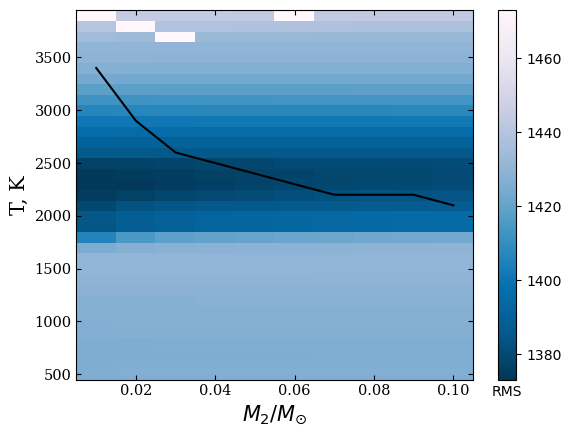

In [20]:
#RMS=RMS*100000
os.chdir(r'/home/parallels/V455_And/gemini_data')
T2_border=[3400, 2900, 2600, 2500, 2400, 2300, 2200, 2200, 2200, 2100]
fig, ax = plt.subplots()
plt.pcolor(M2, grid[0], RMS, cmap='PuBu_r', vmin = np.min(RMS), vmax = np.max(RMS))
im = plt.pcolor(M2, grid[0], RMS, cmap='PuBu_r', vmin = np.min(RMS), vmax = np.max(RMS))
#plt.colorbar(label="Reduced $\\chi^{2}$", orientation="horizontal")
cbar = plt.colorbar(orientation="vertical")
cbar.ax.set_xlabel(xlabel="RMS", size=10)
im.figure.axes[1].tick_params(axis="x", labelsize=15)


print(grid[0])

plt.xticks(**csfont, size=15)
plt.yticks(**csfont, size=15)
plt.clim(np.min(RMS), np.min(RMS)+100)
ax.plot(M2, T2_border, '-k')
plt.ylabel('T, K', **csfont, size=15)
plt.xlabel('$M_{2}/M_{\odot}$', **csfont, size=15)
plt.tick_params(axis="both", direction="in", right='on', top='on', labelsize=10.5)
'''
import matplotlib.colors
ax.legend(loc='best', prop={'size': 12})
levels = np.linspace(np.min(RMS), np.min(RMS), 2)
cnt = ax.contour(M2, grid[0], RMS, levels=levels, cmap='YlGnBu', vmin = np.min(RMS), vmax = np.max(RMS))
norm= matplotlib.colors.Normalize(vmin=cnt.cvalues.min(), vmax=cnt.cvalues.min()+0.3)
sm = plt.cm.ScalarMappable(norm=norm, cmap = cnt.cmap)
sm.set_array([])
'''
bord=np.array([M2, T2_border])
bord=bord.transpose()

np.savetxt('RMS', RMS)
np.savetxt('M2', M2)
np.savetxt('T2', grid[0])
np.savetxt('Border', bord)

2300.0
4.8574443055917405
1373.080303195121
1373.080303195121
[1.818895341078882e-08, 2235836.664549249, -1.9881293243077836]
[4.85744431 4.96508151 5.02837029 5.07322683 5.10787686 5.1360193
 5.15964281 5.17994247 5.19769374 5.21342891]


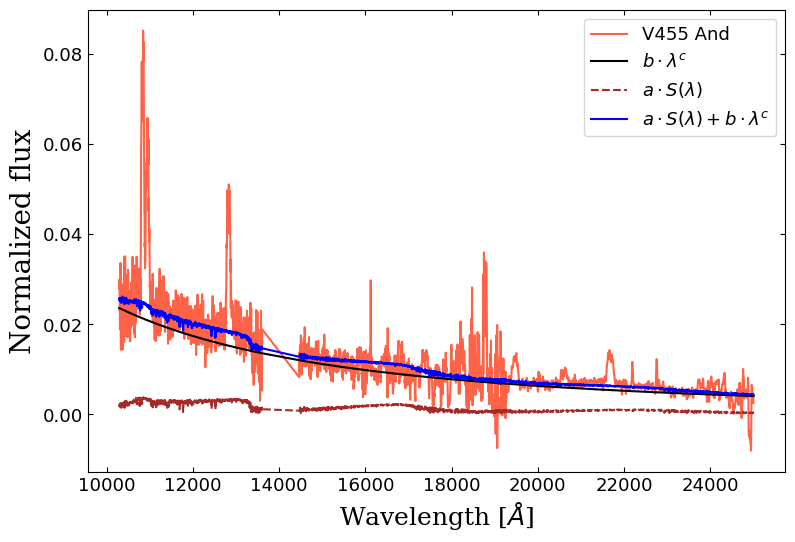

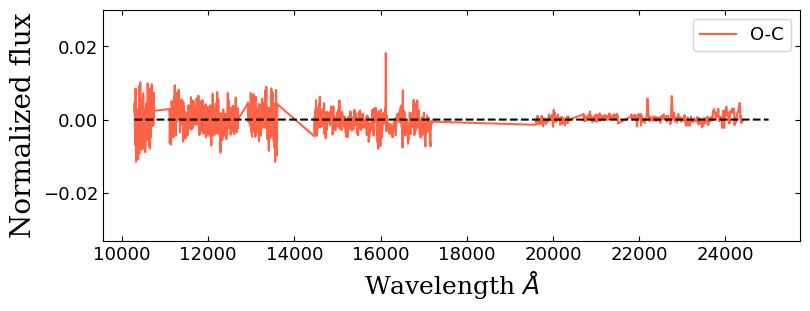

In [13]:
for i in range(len(RMS)):
    for j in range(len(lgg)):
        if RMS[i][j] == np.min(RMS):
            print(grid[0][i])
            print(lgg[j])
            print(RMS[i][j])
            print('a = ' + str(COEFFS[i][j][0]) + ', b = ')

            for k in range(1, len(grid[1][i])):
                if (lgg[j] > grid[1][i][k-1] and lgg[j] < grid[1][i][k]):
                    
                    theory_fluxes=linear_interp(grid[3][i][k-1], grid[3][i][k], grid[1][i][k-1], grid[1][i][k], lgg[j])

                    break
            
            fluxes=np.interp(sed_cont, sed_wv, theory_fluxes)
            s=0
            s1=0
            s2=0
            for f in range(len(sed_cont)):
                s+=(sed_cofl[f] - COEFFS[i][j][0]*fluxes[f] - COEFFS[i][j][1]*sed_cont[f]**(COEFFS[i][j][2]))*sed_cont[f]**(COEFFS[i][j][2])*np.log(sed_cont[f])
                s1+=fluxes[f]*(sed_cofl[f] - COEFFS[i][j][0]*fluxes[f] - COEFFS[i][j][1]*sed_cont[f]**(COEFFS[i][j][2]))
                s2+=(sed_cofl[f] - COEFFS[i][j][0]*fluxes[f] - COEFFS[i][j][1]*sed_cont[f]**(COEFFS[i][j][2]))*sed_cont[f]**(COEFFS[i][j][2])
            s=s*(-2*COEFFS[i][j][1])
            s1=s1*(-2)
            s2=s2*(-2)
            S=s+s1+s2

            fit=powerlaw(COEFFS[i][j][0], COEFFS[i][j][1], COEFFS[i][j][2], sed_wv, theory_fluxes)
            fit_oc=powerlaw(COEFFS[i][j][0], COEFFS[i][j][1], COEFFS[i][j][2], sed_cont, fluxes)
            power=COEFFS[i][j][1]*sed_wv**COEFFS[i][j][2]
            secondary=COEFFS[i][j][0]*theory_fluxes 

            plt.figure(figsize=(9, 6))
            #plt.title(str(grid[0][i]) + ', ' + str(lgg[j]) + ', a=' + str(COEFFS[i][j][0])  + ', b=' + str(COEFFS[i][j][1]) + ' at c min=' + str(COEFFS[i][j][2]))
            plt.plot(sed_wv, sed_fl, color='tomato', label='V455 And')
            plt.plot(sed_wv, power, '-k', label='$b\cdot\\lambda^{c}$')
            plt.plot(sed_wv, secondary, '--', color='brown', label='$a \cdot S(\\lambda)$')
            plt.plot(sed_wv, fit, '-b', label='$a \cdot S(\\lambda) + b\cdot\\lambda^{c}$')
            plt.ylabel('Normalized flux', **csfont, size=20)
            plt.xlabel('Wavelength [$\\AA$]', **csfont, size=18)
            plt.tick_params(axis="both", direction="in", right='on', top='on', labelsize=13)
            plt.legend(prop={'size': 13})
            plt.figure(figsize=(9, 3))
            plt.plot(sed_cont, sed_cofl - fit_oc, '-', color='tomato', label='O-C')
            plt.ylim(-0.033, 0.03)
            plt.ylabel('Normalized flux', **csfont, size=20)
            plt.xlabel('Wavelength $\\AA$', **csfont, size=18)
            plt.tick_params(axis="both", direction="in", right='on', top='on', labelsize=13)
            plt.plot(sed_wv, np.zeros(len(sed_wv)), '--k')
            plt.legend(prop={'size': 13})

            os.chdir(r'/home/parallels/V455_And/gemini_data')

            jhk_cont = np.array([sed_cont, sed_cofl])
            jhk_cont=jhk_cont.transpose()

            sed=np.array([sed_wv, sed_fl])
            sed=sed.transpose()

            disk=np.array([sed_wv, power])
            disk=disk.transpose()

            L2dwarf=np.array([sed_wv, secondary])
            L2dwarf=L2dwarf.transpose()

            result_fit=np.array([sed_wv, fit])
            result_fit=result_fit.transpose()

            oc=np.array([sed_cont, sed_cofl - fit_oc])
            oc=oc.transpose()

            np.savetxt('O-C', oc)
            np.savetxt('result_fit', result_fit)
            np.savetxt('secondary', L2dwarf)
            np.savetxt('Disk_component', disk)
            np.savetxt('JHK_spec', sed)            
            np.savetxt('JHK_cont', jhk_cont)
            
            break

                
print(lgg)